In [11]:
ls

Cancer.csv       HW4.pdf          Heart_short.csv


In [12]:
# Importing libraries and packages:

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
# reading a CSV file directly from Web (or local drive), and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local drive:

In [14]:
Heart_df = pd.read_csv('Heart_short.csv')

In [15]:

# checking the dataset by printing every 10 lines:

In [16]:
Heart_df.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No


In [17]:
# checking the dataset by printing every 10 lines:
Heart_df[0::10]

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
10,57,140,192,0,148,0.4,No
20,64,110,211,2,144,1.8,No
30,69,140,239,0,151,1.8,No
40,40,140,199,0,178,1.4,No
50,51,125,213,2,125,1.4,No
60,39,140,321,2,182,0.0,No
70,62,130,231,0,146,1.8,No
80,57,128,303,2,159,0.0,No
90,52,118,186,2,190,0.0,No


In [18]:
# Creating the Feature Matrix for Heart dataset:

# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['Age','RestBP','Chol','RestECG' ,'MaxHR', 'Oldpeak']

# use the above list to select the features from the original DataFrame
X = Heart_df[feature_cols]  

# print the first 5 rows
X.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak
0,63,145,233,2,150,2.3
1,67,160,286,2,108,1.5
2,67,120,229,2,129,2.6
3,37,130,250,0,187,3.5
4,41,130,204,2,172,1.4


In [19]:
# select a Series of labels (the last column) from the DataFrame
y = Heart_df['AHD']

# checking the label vector by printing every 10 values
y[::10]

0       No
10      No
20      No
30      No
40      No
50      No
60      No
70      No
80      No
90      No
100     No
110     No
120     No
130     No
140     No
150    Yes
160     No
170    Yes
180     No
190     No
200     No
210    Yes
220     No
230     No
240     No
250    Yes
260    Yes
270    Yes
280     No
Name: AHD, dtype: object

In [20]:
#Step3: Defining (instantiating) an "object" from the sklearn class:¶

In [21]:
# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
my_logreg = LogisticRegression()
my_decisiontree = DecisionTreeClassifier()


In [23]:
#### Step5: Testing (Prediction) Stage: Making prediction on new observations (Testing Data) using the trained model:
#Now, Suppose that we have a new observation (a new data sample) with Known features [6, 3, 5.9, 2.9], and Unknown label. What would be our predition for the label of this new observation?
#### Method "predict" is used for many sklearn classes

In [32]:

my_logreg.fit(X, y)

my_decisiontree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
# We use the method "predict" of the *trained* object knn on one or more testing data sample to perform prediction:

# Prediction for Two new data samples:

X_Testing = [[67, 120, 229, 2, 129, 2.6],[37, 130, 250, 0, 187, 3.5]]

y_predict_lr = my_logreg.predict(X_Testing)

y_predict_dt = my_decisiontree.predict(X_Testing)

print(y_predict_lr)
print(y_predict_dt)

['Yes' 'No']
['Yes' 'No']


In [36]:
#Accurcary Evaluation

In [37]:
## Evaluating the accuracy of our classifier:

#### Now to evaluate our model, 
#as we learned in previous tutorial, let's split the data into training and testing sets. 
#Then, assuming that we do NOT know the label of Testing Set, we train our model on Training Set and then test it on Testing Set. 
#Then, we compare the "predicted labels" against the "actual labels" to check the accuracy.

In [38]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.3" means that pick 30% of data samples for testing set, and the rest (70%) for training set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=3)

In [39]:
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

(210, 6)
(210,)


In [40]:
# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(71, 6)
(71,)


In [42]:
# Testing on the testing set:

y_predict_lr = my_logreg.predict(X_test)

y_predict_dt = my_decisiontree.predict(X_test)

print(y_predict_lr)
print(y_predict_dt)

['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No']
['No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No'
 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No']


In [43]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
# Function "accuracy_score" from "sklearn.metrics" will perform the element-to-element comparision and returns the 
# portion of correct predictions:

from sklearn.metrics import accuracy_score

score_lr = accuracy_score(y_test, y_predict_lr)
score_dt = accuracy_score(y_test, y_predict_dt)

print(score_lr)
print(score_dt)

0.7183098591549296
1.0


In [44]:
## Estimating the Probability (likelihood) of happening an Event: 
##### As we mentioned before, Logistic Regression can also estimate the probability of happening the event (estimating the likelihood of each label) rather than just providing a binary prediction (see Logistic Regression lecture for more information).
##### Thus, we can adjust the True Positive Rate (TPR = Sensitivity) and False Positive Rate (FPR = False Alarm Rate) by changing the decision Threshold (see Model Evaluation lecture for more information).

In [45]:
# Predicting the Binary Label:
y_predict_lr = my_logreg.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)

In [46]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_lr)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_lr)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])

253     No
74     Yes
230     No
38     Yes
16     Yes
66      No
31     Yes
123    Yes
177    Yes
175     No
155    Yes
259     No
50      No
82     Yes
25      No
73     Yes
264    Yes
162    Yes
214    Yes
270    Yes
84     Yes
157     No
196     No
46      No
229    Yes
193     No
64      No
65      No
108     No
252    Yes
      ... 
58      No
14      No
266     No
161     No
225    Yes
83      No
205     No
23     Yes
43      No
67      No
24     Yes
200     No
61     Yes
198     No
247     No
5       No
136    Yes
154     No
145     No
235     No
208     No
40      No
102    Yes
146    Yes
168     No
15      No
78      No
109     No
122     No
142     No
Name: AHD, Length: 71, dtype: object
['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No

In [47]:
# True Positive Rate (TPR) and False Positive Rate (FPR):

In [49]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.         0.01408451 1.        ]
[nan nan nan]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [50]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

nan


In [57]:
#ROC Curve:

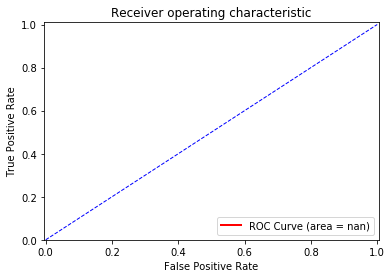

In [52]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [58]:
### Repeating the process with smaller number of features:

In [60]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols2 = ['Age','RestBP']

# use the above list to select the features from the original DataFrame
X2 = Heart_df[feature_cols2] 

# select a Series of labels (the last column) from the DataFrame
y2 = Heart_df['AHD']

#Splitting the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=2)

my_logreg2 = LogisticRegression()
my_logreg2.fit(X_train2,y_train2)

# Predicting the Binary Label:
y_predict_lr2 = my_logreg2.predict(X_test2)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr2 = my_logreg2.predict_proba(X_test2)

fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, y_predict_prob_lr2[:,1], pos_label=1)
AUC2 = metrics.auc(fpr2, tpr2)
print(AUC2)

nan


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
